In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import os

In [2]:
df = pd.read_parquet("../data/n_tau_0.0.1/N_tau_relationship")

### Extract by median r2 per N and noise level

In [3]:
records = list()
for N in df["N"].unique():
    for noise in df.loc[df["N"]==N, "noise"].unique():
        temp_df = df.loc[(df["N"]==N) & (df["noise"]==noise)]
        
        r2 = temp_df["r2"].quantile(q=0.5, interpolation="higher") # get r2 median value
        temp_df = temp_df.loc[temp_df["r2"]==r2]
        tau, beta_ind = int(temp_df["tau"].mean()), int(temp_df["beta_ind"].mean()) # get corresponding beta_ind and tau
        
        records.append({
            "N":N,
            "noise":noise,
            "beta_ind":beta_ind,
            "r2": r2,
            "tau":tau
        })
        

In [4]:
df_result = pd.DataFrame.from_records(records)

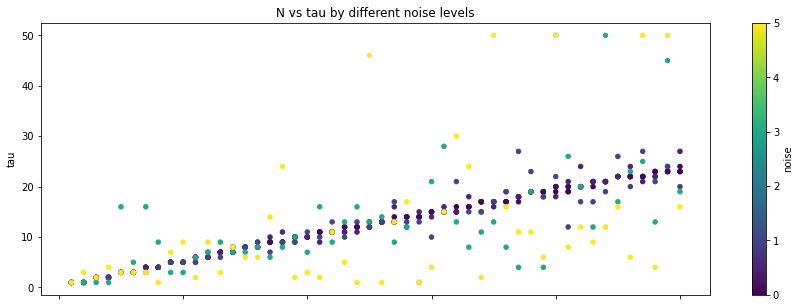

In [6]:
# plotly
fig = px.scatter(data_frame=df_result, x="N", y="tau", color="noise", hover_data=["beta_ind", "r2"],
#            size="beta_ind",
           trendline="ols",
                title="N vs tau by different noise levels")
fig.show()

# matplotlib
df_result.plot(kind="scatter", x="N", y="tau", c="noise", cmap="viridis", 
               figsize=(15,5), title="N vs tau by different noise levels");

In [7]:
# save plotly
os.makedirs("../data/n_tau_0.0.1/plots", exist_ok=True)
fig.write_html("../data/n_tau_0.0.1/plots/N_tau_relationship.html")

### How to Report Results

In [7]:
from sklearn.linear_model import LinearRegression

In [10]:
df_best_no_noise = df.loc[df.loc[(df['noise']==0) & (df['beta_ind'] != 0)].groupby("N")['r2'].idxmax(), ["N","tau"]].reset_index(drop=True)

In [11]:
reg = LinearRegression().fit(df_best_no_noise['N'].values.reshape(-1, 1), df_best_no_noise['tau'].values.reshape(-1, 1))

In [13]:
df_best_no_noise['least_squares_tau'] = reg.predict(df_best_no_noise['N'].values.reshape(-1, 1)).reshape(-1,)

Simulation Results (noise=0 and beta_ind != 0):
tau = 0.43740696278511404 * N + 0.986122448979593


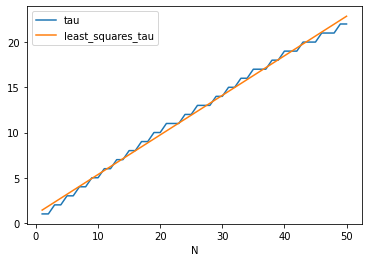

In [17]:
print("Simulation Results (noise=0 and beta_ind != 0):")
print(f"tau = {reg.coef_.item()} * N + {reg.intercept_.item()}")
df_best_no_noise.set_index('N').plot();